In [1]:
import sqlite3
conn = sqlite3.connect('lending-club-loan-data/database.sqlite')
c = conn.cursor()

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 80)
pd.set_option('display.max_rows', 80)
## only select rows that are fully funded and are individual loans (no joint loans)
data=pd.read_sql('''
SELECT *
FROM loan
WHERE funded_amnt==loan_amnt AND (application_type LIKE '%INDIVIDUAL%') AND term LIKE '%36 months%'
''',conn)

In [3]:
data.drop(['index'],axis=1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,None,10+ years,RENT,24000.00,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.0000,Jan-2015,171.62,None,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,None,10+ years,RENT,12252.00,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5%,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.0000,Jun-2014,649.91,None,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.0000,Jan-2015,357.48,None,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1075269,1311441.0,5000.0,5000.0,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,Nov-2004,3.0,NaN,NaN,9.0,0.0,7963.0,28.3%,12.0,f,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.0000,Jan-2015,161.03,None,Sep-2015,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1072053,1288686.0,3000.0,3000.0,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,0.0,Jan-2007,2.0,NaN,NaN,4.0,0.0,8221.0,87.5%,4.0,f,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.0000,Jan-2015,111.34,None,Dec-2014,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1069908,1305008.0,12000.0,12000.0,12000.0,36 months,12.69%,402.54,B,B5,UCLA,10+ years,OWN,75000.00,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,None,debt_consolidation,Consolidation,913xx,CA,10.78,0.0,Oct-1989,0.0,NaN,NaN,12.0,0.0,23336.0,67.1%,34.0,f,0.00,0.00,13943.080000,13943.08,12000.00,1943.08,0.00,0.00,0.0000,Sep-2013,6315.30,None,Aug-2013,0.0,NaN,1.0,INDIVIDUAL,None,None,None,0.0,NaN,Na

In [4]:
data.columns.values

array(['index', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificat

In [5]:
feat_raw=pd.DataFrame
memberinfo=['id','loan_amnt','term','int_rate','installment','emp_title', 'emp_length', 'home_ownership',
       'annual_inc','loan_status','purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc','total_pymnt','total_rec_prncp','total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d','collections_12_mths_ex_med', 'mths_since_last_major_derog']
feat_raw=data[memberinfo].copy()


In [6]:
feat_raw.dtypes

id                              object
loan_amnt                      float64
term                            object
int_rate                        object
installment                    float64
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                    float64
earliest_cr_line                object
inq_last_6mths                 float64
mths_since_last_delinq         float64
mths_since_last_record         float64
open_acc                       float64
pub_rec                        float64
revol_bal                      float64
revol_util                      object
total_acc                      float64
total_pymnt                    float64
total_rec_prncp                float64
total_rec_int            

## Look for nulls in the data

In [7]:
feat_raw.isnull().sum()

id                                  0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
emp_title                       41496
emp_length                          0
home_ownership                      0
annual_inc                          4
loan_status                         0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        28
earliest_cr_line                   28
inq_last_6mths                     28
mths_since_last_delinq         316869
mths_since_last_record         519656
open_acc                           28
pub_rec                            28
revol_bal                           0
revol_util                        384
total_acc                          28
total_pymnt                         0
total_rec_prncp                     0
total_rec_int                       0
total_rec_la

In [8]:
feat_raw.annual_inc.fillna(0,inplace=True)
feat_raw.revol_bal.fillna(0,inplace=True)
feat_raw.collections_12_mths_ex_med.fillna(0,inplace=True)
feat_raw.isnull().sum()

id                                  0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
emp_title                       41496
emp_length                          0
home_ownership                      0
annual_inc                          0
loan_status                         0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                        28
earliest_cr_line                   28
inq_last_6mths                     28
mths_since_last_delinq         316869
mths_since_last_record         519656
open_acc                           28
pub_rec                            28
revol_bal                           0
revol_util                        384
total_acc                          28
total_pymnt                         0
total_rec_prncp                     0
total_rec_int                       0
total_rec_la

28 shows up a lot, I suspect they are the same 28 loans with many suspicious NaNs. I shall inspect.
## Inspect the curious 28 nans

In [9]:
feat_raw.query('total_acc != total_acc')

,id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog
30603,79967,5000.0,36 months,7.43%,155.38,None,< 1 year,NONE,0.0,Does not meet the credit policy. Status:Fully ...,other,NY,1.00,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,5593.46,5000.00,593.46,0.000000,0.00,0.0000,Aug-2010,157.31,Sep-2010,0.0,NaN
30604,79924,7000.0,36 months,7.75%,218.55,None,< 1 year,NONE,0.0,Does not meet the credit policy. Status:Fully ...,other,NY,1.00,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,7867.53,7000.00,867.53,0.000000,0.00,0.0000,Aug-2010,220.03,Sep-2010,0.0,NaN
30613,71823,4350.0,36 months,8.07%,136.45,None,< 1 year,RENT,120000.0,Does not meet the credit policy. Status:Fully ...,other,MA,4.00,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,4911.68,4350.00,561.68,0.000000,0.00,0.0000,Aug-2010,139.93,Sep-2010,0.0,NaN
30624,72197,3900.0,36 months,9.33%,124.62,None,< 1 year,RENT,98000.0,Does not meet the credit policy. Status:Fully ...,other,NY,10.00,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,4485.99,3900.00,585.99,0.000000,0.00,0.0000,Aug-2010,126.06,Sep-2010,0.0,NaN
30632,79893,6700.0,36 months,7.75%,209.18,None,< 1 year,NONE,0.0,Does not meet the credit policy. Status:Fully ...,other,NY,1.00,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,7530.42,6700.00,830.42,0.000000,0.00,0.0000,Jul-2010,209.89,Aug-2010,0.0,NaN
30635,73003,3200.0,36 months,9.96%,103.20,None,< 1 year,MORTGAGE,150000.0,Does not meet the credit policy. Status:Fully ...,other,MA,10.00,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,3590.53,3200.00,390.53,0.000000,0.00,0.0000,Feb-2009,1733.32,Mar-2009,0.0,NaN
30658,91023,1900.0,36 months,9.64%,61.00,Scheduall,1 year,MORTGAGE,100000.0,Does not meet the credit policy. Status:Fully ...,debt_consolidation,FL,10.00,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,1999.12,1900.00,99.12,0.000000,0.00,0.0000,Feb-2008,0.00,Feb-2008,0.0,NaN
30663,85961,1200.0,36 months,9.01%,38.17,Classic Components,< 1 year,RENT,36000.0,Does not meet the credit policy. Status:Fully ...,other,TX,3.27,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,1373.88,1200.00,173.88,0.000000,0.00,0.0000,Jul-2010,39.05,Jul-2010,0.0,NaN
30664,85818,5000.0,36 months,11.22%,164.23,Compensation Solutions,< 1 year,RENT,28000.0,Does not meet the credit policy. Status:Fully ...,other,NJ,3.51,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,5858.35,5000.00,828.36,29.994759,0.00,0.0000,Apr-2010,149.43,Apr-2010,0.0,NaN
30665,85781,1400.0,36 months,10.91%,45.78,"Stanford University Libraries, LOCKSS Project",< 1 year,RENT,40000.0,Does not meet the credit policy. Status:Fully ...,other,MO,8.61,NaN,None,NaN,NaN,NaN,NaN,NaN,0.0,None,NaN,1663.04,1400.00,248.05,14.994369,0.00,0.0000,Jul-2010,1.78,Aug-2010,0.0,NaN


Most interestingly, they all have a status "Does not meet the credit policy". Lets look into that, as that is not an expected value.

In [10]:
grp = feat_raw.groupby('loan_status')
grp.describe()

annual_inc  \
loan_status                                                              
Charged Off                                        count  2.899900e+04   
                                                   mean   6.115969e+04   
                                                   std    6.455718e+04   
                                                   min    4.080000e+03   
                                                   25%    3.700000e+04   
                                                   50%    5.130000e+04   
                                                   75%    7.300000e+04   
                                                   max    8.706582e+06   
Current                                            count  4.026380e+05   
                                                   mean   7.367112e+04   
                                                   std    6.754683e+04   
                                                   min    3.000000e+03   
                                                   25%    4.300000e+04   
                                                   50%    6.100000e+04   
                                                   75%    8.911925e+04   
                                                   max    9.000000e+06   
Default                                            count  7.150000e+02   
                                                   mean   6.228154e+04   
                                                   std    5.963224e+04   
                                                   min    9.300000e+03   
                                                   25%    3.625000e+04   
                                                   50%    5.100000e+04   
                                                   75%    7.431300e+04   
                                                   max    1.300000e+06   
Does not meet the credit policy. Status:Charged... count  6.170000e+02   
                                                   mean   6.959296e+04   
                                                   std    6.377857e+04   
                                                   min    2.000000e+03   
                                                   25%    3.600000e+04   
                                                   50%    5.200000e+04   
                                                   75%    7.800000e+04   
                                                   max    7.000000e+05   
Does not meet the credit policy. Status:Fully Paid count  1.717000e+03   
                                                   mean   7.159994e+04   
                                                   std    7.424415e+04   
                                                   min    0.000000e+00   
                                                   25%    3.650000e+04   
                                                   50%    5.500000e+04   
                                                   75%    8.400000e+04   
                                                   max    1.440000e+06   
Fully Paid                                         count  1.668900e+05   
                                                   mean   7.202174e+04   
                                                   std    6.023799e+04   
                                                   min    3.000000e+03   
                                                   25%    4.400000e+04   
                                                   50%    6.099600e+04   
                                                   75%    8.600000e+04   
                                                   max    7.141778e+06   
In Grace Period                                    count  3.974000e+03   
                                                   mean   7.486149e+04   
                                                   std    1.543129e+05   
                                                   min    7.680000e+03   
                                                   25%    4.2000

## Remove "Issued" loans, and "Does not meet the credit policy" loans.

Issued loans have no payments and therefore give minimal information beyond that they were funded. Credit policy loans are a strange status, and they account for only ~2500 loans.

In [11]:
feat_raw=feat_raw[~feat_raw['loan_status'].isin(['Issued',
                                                 'Does not meet the credit policy. Status:Charged Off',
                                                 'Does not meet the credit policy. Status:Fully Paid'])]
grp = feat_raw.groupby('loan_status')
grp.describe()

annual_inc  collection_recovery_fee  \
loan_status                                                       
Charged Off        count  2.899900e+04             28999.000000   
                   mean   6.115969e+04                69.970545   
                   std    6.455718e+04               225.409847   
                   min    4.080000e+03                 0.000000   
                   25%    3.700000e+04                 0.000000   
                   50%    5.130000e+04                 0.700000   
                   75%    7.300000e+04                17.289700   
                   max    8.706582e+06              7002.190000   
Current            count  4.026380e+05            402638.000000   
                   mean   7.367112e+04                 0.000000   
                   std    6.754683e+04                 0.000000   
                   min    3.000000e+03                 0.000000   
                   25%    4.300000e+04                 0.000000   
                   50%    6.100000e+04                 0.000000   
                   75%    8.911925e+04                 0.000000   
                   max    9.000000e+06                 0.000000   
Default            count  7.150000e+02               715.000000   
                   mean   6.228154e+04                 0.000000   
                   std    5.963224e+04                 0.000000   
                   min    9.300000e+03                 0.000000   
                   25%    3.625000e+04                 0.000000   
                   50%    5.100000e+04                 0.000000   
                   75%    7.431300e+04                 0.000000   
                   max    1.300000e+06                 0.000000   
Fully Paid         count  1.668900e+05            166890.000000   
                   mean   7.202174e+04                 0.000000   
                   std    6.023799e+04                 0.000000   
                   min    3.000000e+03                 0.000000   
                   25%    4.400000e+04                 0.000000   
                   50%    6.099600e+04                 0.000000   
                   75%    8.600000e+04                 0.000000   
                   max    7.141778e+06                 0.000000   
In Grace Period    count  3.974000e+03              3974.000000   
                   mean   7.486149e+04                 0.000000   
                   std    1.543129e+05                 0.000000   
                   min    7.680000e+03                 0.000000   
                   25%    4.200000e+04                 0.000000   
                   50%    6.000000e+04                 0.000000   
                   75%    8.524125e+04                 0.000000   
                   max    8.900060e+06                 0.000000   
Late (16-30 days)  count  1.483000e+03              1483.000000   
                   mean   6.939211e+04                 0.000000   
                   std    4.639190e+04                 0.000000   
                   min    1.000000e+04                 0.000000   
                   25%    4.088860e+04                 0.000000   
                   50%    6.000000e+04                 0.000000   
                   75%    8.500000e+04                 0.000000   
                   max    6.000000e+05                 0.000000   
Late (31-120 days) count  7.026000e+03              7026.000000   
                   mean   6.552567e+04                 0.000000   
                   std    4.437685e+04                 0.000000   
                   min    4.524000e+03                 0.000000   
                   25%    4.000000e+04                 0.000000   
                   50%    5.500000e+04                 0.000000   
                   75%    8.000000e+04                 0.000000   
                   max    8.000000e+05                 0.000000   

                          collections_12_mths_ex_med    delinq_2yrs  \
loan_status                                                           

## Convert numeric objects into numerics

In [12]:
feat_raw.term=data.term.str.replace(' months','')
feat_raw.term=feat_raw.term.apply(pd.to_numeric)
feat_raw.int_rate=data.int_rate.str.replace('%','')
feat_raw.int_rate=feat_raw.int_rate.apply(pd.to_numeric)

feat_raw.revol_util=data.revol_util.str.replace('%','')
feat_raw.revol_util.isnull().sum()


344

In [13]:
feat_raw.revol_util.fillna(0,inplace=True)
feat_raw.revol_util=feat_raw.revol_util.apply(pd.to_numeric)
feat_raw.revol_util.isnull().sum()

0

In [14]:
feat_raw.revol_util.dtype

dtype('float64')

## Convert dates to date time, and then get a difference to calculate number of payments made so far

In [15]:
feat_raw['last_pymnt_d']=pd.to_datetime(data.last_pymnt_d, format='%b-%Y')
feat_raw['issue_d']=pd.to_datetime(data.issue_d, format='%b-%Y')
feat_raw['earliest_cr_line']=pd.to_datetime(data.earliest_cr_line, format='%b-%Y')

In [16]:
feat_raw['num_pymnts']=round((feat_raw.last_pymnt_d-feat_raw.issue_d)/ np.timedelta64(1, 'M'))

In [17]:
feat_raw['pymnts_left']=(feat_raw.term-feat_raw.num_pymnts).fillna(0)

In [18]:
feat_raw['current']=feat_raw.loan_status.str.match('Current')

## Inspect employment length and convert to numeric

There has to be a better way, but this way will work...

In [19]:
feat_raw.emp_length

0         10+ years
1         10+ years
2         10+ years
3           3 years
4           9 years
5         10+ years
6          < 1 year
7           3 years
8           3 years
9          < 1 year
10          4 years
11        10+ years
12           1 year
13          6 years
14        10+ years
15        10+ years
16          5 years
17           1 year
18          2 years
19          9 years
20        10+ years
21         < 1 year
22          7 years
23          5 years
24          2 years
25          7 years
26        10+ years
27          2 years
28           1 year
29           1 year
30          4 years
31        10+ years
32          9 years
33        10+ years
34        10+ years
35          6 years
36        10+ years
37          6 years
38        10+ years
39          5 years
            ...    
619975    10+ years
619976          n/a
619977    10+ years
619978      2 years
619979      4 years
619980      7 years
619981      2 years
619982    10+ years
619983      5 years


In [20]:
feat_raw.emp_length=data.emp_length.str.replace(' year','')
feat_raw.emp_length=feat_raw.emp_length.str.replace('s','')
feat_raw.emp_length=feat_raw.emp_length.str.replace('+','')
feat_raw.emp_length=feat_raw.emp_length.str.replace('< 1','0.5')
feat_raw.emp_length=feat_raw.emp_length.str.replace('n/a','0')
feat_raw.emp_length=feat_raw.emp_length.apply(pd.to_numeric)
feat_raw.emp_length.dtype

dtype('float64')

## Developing a metric to optimize

We want to maximize the total money gained vs the loan amount. This is called a "buy rate" multiplier. For example, If a borrower receives \$12,000 and pays back \$15,000, the buy rate is 1.25, and can effectvely be thought of as 1+ interest. Although LC loans are amortized, a buy rate is a post hoc measure that penalizes loans paid early. Importantly, we do not want to penalize loans still current and in the process of payment, so the metric will have a logical gate to apply a different divisor to current loans.

For fully paid, late, and charged off loans, the equation takes the total amount paid to date, and divides it by the initial investment amount.

**Equation 1: "settled" loan buy rate** 
$$[buy\ rate]=\frac{[total\ payments\ received]}{[loan\ amount]}$$

Where the total payments received sums principle, interest, and late fee paid. A loan paid off with zero interest accrued or paid will have a value of 1.0, charged off loans will have values less than 1, and all other paid off loans will have a multiplier equivalent to 1+effective interest rate. 

Notably, this unfairly penalizes loans that were categorized as *"late"* during the time the data was acquired, but I'm okay with that as late loans are intuitively riskier than current loans that have been brought up to current. This is a potential assumption to probe at some point, however I think the overwhelming number of current, fully paid, and charged off loans will make this unimportant. It is worth noting that loans that were ever late are harder to sell on the secondary loan market, so even if they were brought to current, late loans have less potential liquidity.
 
For current loans, I approximate the expected principle return as the investment amount divided over the length of the loan, and prorated for the number of months the loan has been active 

**Equation 2: "current" loan buy rate**
$$[buy\ rate]=\frac{[payments\ received\ to\ date]}{(\frac{[loan\ amount]}{[loan\ term]}*[months\ active])}$$

Amortization is not linear (more interest is paid up front), but amortization only matters if loans are paid off early, and the fully paid loans are handled with the simpler equation above. This simple metric is blind to loans that will be paid off early, or that will default (both will lower effective "buy rate") in the future, and assumes all current loans will be paid off according to schedule.

Effectively, current and fully paid (on schedule) loans will have buy rates tied directly to their interest rate. Loans paid off early will be penalized slightly from their given interest rate. Defaulted and late loans will be penalized according to how much of the principle was paid, with a 0 being a total loss, and values below 1.0 being partial losses. Interestingly, loans that accrue late fees but eventually are paid in full on schedule will be rewarded slightly. I'm not confident that this happens often enough (in comparision to late fee paying loans that eventually default) to incentivize risky loans appreciably more than the interest rate does on it's own.

Importantly, as LC sets interest rates according to the same borrower data that I can use (and potentially they actually have more), this is an exercise in finding slippage in the general loan market algorithm, heavily incentivized towards finding borrowers who appear (to loaners) riskier than the data says they are. 

### "Smart" metric (with logical gate dependent on "current" feature)
This is the metric we want to regress.

In [21]:
feat_raw['balance1']=(feat_raw.total_pymnt)/((feat_raw.loan_amnt/feat_raw.term)*(feat_raw.current*(feat_raw.term-feat_raw.pymnts_left)+(1-feat_raw.current)*feat_raw.term))




### "Dumb" metric which is correct for settled loans, but penalizes current loans
this would be a poor metric to take advantage of all loan data, but could be used if we just looked at settled loans.

In [22]:
feat_raw['balance2']=(feat_raw.total_pymnt)/(feat_raw.loan_amnt)



### Comparison of metrics
balance1 is equal to balance2 when loans are settled, and it prorates current loans, while balance2 penalizes them since they are not fully paid.

In [23]:
feat_raw[['int_rate','loan_amnt','balance1','balance2','pymnts_left','loan_status','num_pymnts','total_rec_prncp','total_rec_int','total_rec_late_fee']]

,int_rate,loan_amnt,balance1,balance2,pymnts_left,loan_status,num_pymnts,total_rec_prncp,total_rec_int,total_rec_late_fee
0,10.65,5000.0,1.172214,1.172214,-1.0,Fully Paid,37.0,5000.00,861.07,0.00
1,15.96,2400.0,1.251522,1.251522,6.0,Fully Paid,30.0,2400.00,603.65,0.00
2,13.49,10000.0,1.222630,1.222630,-1.0,Fully Paid,37.0,10000.00,2209.33,16.97
3,7.90,5000.0,1.126276,1.126276,-1.0,Fully Paid,37.0,5000.00,631.38,0.00
4,18.64,3000.0,1.312715,1.312715,-1.0,Fully Paid,37.0,3000.00,938.14,0.00
5,12.69,12000.0,1.161923,1.161923,15.0,Fully Paid,21.0,12000.00,1943.08,0.00
6,13.49,9000.0,0.252300,0.252300,29.0,Charged Off,7.0,1256.14,570.26,0.00
7,9.91,3000.0,1.159661,1.159661,-1.0,Fully Paid,37.0,3000.00,478.98,0.00
8,10.65,10000.0,0.747199,0.747199,14.0,Charged Off,22.0,5433.47,1393.42,0.00
9,16.29,1000.0,1.270171,1.270171,-1.0,Fully Paid,37.0,1000.00,270.17,0.00


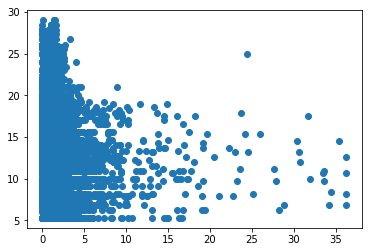

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(feat_raw.balance1,feat_raw.int_rate)
plt.show()

Interestingly, there are a lot of loans with really high mutliples. What is causing this? Ideally I expect values between 0 and 2 at the greatest. What is the metric missing?

In [25]:
feat_raw.query('balance1>5 & num_pymnts==0')

,id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,issue_d,num_pymnts,pymnts_left,current,balance1,balance2
348924,67447479,4000.0,36,16.55,141.72,None,0.0,RENT,13500.00,Current,major_purchase,IL,17.42,0.0,2004-09-01,3.0,64.0,24.0,8.0,1.0,1716.0,26.4,14.0,1181.09,1181.09,0.00,0.0,0.0,0.0,2015-12-01,1181.09,Feb-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.295272
354531,66494412,22500.0,36,7.26,697.42,Program Director,10.0,MORTGAGE,100000.00,Current,debt_consolidation,FL,23.70,0.0,1987-12-01,1.0,75.0,NaN,18.0,0.0,22792.0,57.4,49.0,620.28,561.29,58.99,0.0,0.0,0.0,2015-12-01,638.43,Jan-2016,0.0,75.0,2015-12-01,0.0,36.0,True,inf,0.027568
354692,66544862,10000.0,36,6.89,308.27,RN,5.0,MORTGAGE,60000.00,Current,credit_card,FL,16.26,0.0,2006-01-01,0.0,49.0,NaN,14.0,0.0,7715.0,18.5,21.0,281.47,250.85,30.62,0.0,0.0,0.0,2015-12-01,285.30,Jan-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.028147
355140,66634452,7500.0,36,5.32,225.87,Owner-chauffeur,7.0,RENT,31000.00,Current,debt_consolidation,MA,9.91,0.0,1986-12-01,0.0,NaN,NaN,5.0,0.0,8373.0,28.1,9.0,275.00,275.00,0.00,0.0,0.0,0.0,2015-12-01,275.00,Feb-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.036667
355909,66412311,4875.0,36,18.20,176.74,Quaility Assurance,4.0,MORTGAGE,65000.00,Current,debt_consolidation,NJ,11.24,0.0,2011-02-01,2.0,NaN,54.0,13.0,1.0,4609.0,27.8,16.0,144.69,102.79,41.90,0.0,0.0,0.0,2015-12-01,149.62,Jan-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.029680
355976,66521794,5000.0,36,8.38,157.56,Elementary Counselor,9.0,OWN,50000.00,Current,credit_card,TX,8.45,1.0,2001-04-01,0.0,1.0,NaN,13.0,0.0,4673.0,11.9,27.0,135.44,122.64,12.80,0.0,0.0,0.0,2015-12-01,140.10,Feb-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.027088
356159,66270233,9000.0,36,6.24,274.78,Acquisitions & Development,0.5,RENT,50000.00,Current,credit_card,FL,23.79,0.0,2003-01-01,1.0,NaN,NaN,18.0,0.0,14160.0,29.1,20.0,249.82,227.98,21.84,0.0,0.0,0.0,2015-12-01,252.94,Feb-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.027758
356460,66423031,5400.0,36,17.86,194.85,Data Quality Analyst,2.0,RENT,25000.00,Current,debt_consolidation,SC,35.86,0.0,2012-08-01,0.0,NaN,NaN,13.0,0.0,13694.0,52.5,15.0,162.70,114.48,48.22,0.0,0.0,0.0,2015-12-01,168.06,Jan-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.030130
356548,66492794,18000.0,36,5.32,542.07,operations manager,10.0,MORTGAGE,75000.00,Current,debt_consolidation,NV,12.74,0.0,1999-12-01,0.0,NaN,NaN,7.0,0.0,12827.0,25.8,17.0,496.85,462.27,34.58,0.0,0.0,0.0,2015-12-01,502.17,Feb-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.027603
356806,66442820,10000.0,36,7.89,312.86,Driver,10.0,MORTGAGE,65000.00,Current,debt_consolidation,CO,26.11,0.0,2006-08-01,0.0,42.0,NaN,13.0,0.0,9784.0,30.0,23.0,284.37,247.11,37.26,0.0,0.0,0.0,2015-12-01,288.75,Jan-2016,0.0,NaN,2015-12-01,0.0,36.0,True,inf,0.028437


There are two things to note: firstly, there are *current* loans with no payments, creating a metric with a value of infinite. Not only do these loans break the metric, they also give almost no information to our algorithm, since they only thing we know is that they were funded and they sat for a year with "no payments" while still being current. This is fishy and could point to a bug in LC reporting. 

Secondly, it looks like the highest values are directly due to a large upfront lumpsum payment as the only payment, and values between the highest and 2 are loans with a large lump sum and additional regular payments. The more payments since the lump sum, the closer to "convential" values. It is worth noting that only low interest rate loans seem to be paying large lump sums. This meshes with intuition - people that receive nice rates likely are more financially secure and can make large lump sum payments.

## Fixing the metric

As most in this data have at least a year's worth of data, I will approach this with two things: first by removing 'current' loans with less than normal number of payments, and secondly, by attenuating large lump sums payments that do not fully pay the loan.

### First, filter current loans with less than expected number of payments

Explicitly, we want to exclude loans that show less than 11 payments, but are marked "current", NOT loans with less than normal payments that are late, defaulted, or charged off. A non-negligible number of loans default with no payments at all. This gets rid of loans that people pay large lump sums and then stop paying for a while. It does NOT get rid of loans with large lump sums and then all the regular payments.

In [26]:
feat_inform=feat_raw.query('(num_pymnts >11 & current==True) | current==False')

In [27]:
feat_inform[['balance1','balance2','pymnts_left','loan_status','total_rec_prncp','total_rec_int','total_rec_late_fee']]

,balance1,balance2,pymnts_left,loan_status,total_rec_prncp,total_rec_int,total_rec_late_fee
0,1.172214,1.172214,-1.0,Fully Paid,5000.00,861.07,0.00
1,1.251522,1.251522,6.0,Fully Paid,2400.00,603.65,0.00
2,1.222630,1.222630,-1.0,Fully Paid,10000.00,2209.33,16.97
3,1.126276,1.126276,-1.0,Fully Paid,5000.00,631.38,0.00
4,1.312715,1.312715,-1.0,Fully Paid,3000.00,938.14,0.00
5,1.161923,1.161923,15.0,Fully Paid,12000.00,1943.08,0.00
6,0.252300,0.252300,29.0,Charged Off,1256.14,570.26,0.00
7,1.159661,1.159661,-1.0,Fully Paid,3000.00,478.98,0.00
8,0.747199,0.747199,14.0,Charged Off,5433.47,1393.42,0.00
9,1.270171,1.270171,-1.0,Fully Paid,1000.00,270.17,0.00


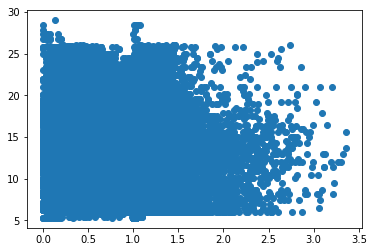

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(feat_inform.balance1,feat_inform.int_rate)
plt.show()

### Uninformative loans
This deals with abberant loans that aren't paid back on a monthly schedule.

### Large lump sum loans
The problem loans now are large lump sum payments on current loans, as they throw off the amortization schedule. The simpliest way to avoid this is to subtract large payments from principal and recalulate, but only the most recent payment information is given so this would be tricky with most of the loans. Instead, with the data I have, the easiest thing to do is to remove any loan with average payments that are much more than the installment amount, and hope for a still large sample set. currently, there are 381,065 loans in the sample. If we remove less that 10% of the data, it won't impact the amount of data too much



In [29]:
feat_inform['excess_pymnt']=(feat_inform.total_pymnt-feat_inform.total_rec_late_fee)/(feat_inform.installment*(feat_raw.term-feat_raw.pymnts_left))



/Users/devinmccormack/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [30]:
feat_inform.query('excess_pymnt>1.1 & current==True')

,id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,issue_d,num_pymnts,pymnts_left,current,balance1,balance2,excess_pymnt
30718,10079471,16000.0,36,7.90,500.65,Lead Business Analyst,10.0,MORTGAGE,98000.00,Current,debt_consolidation,FL,18.21,0.0,1985-02-01,0.0,NaN,NaN,16.0,0.0,27595.0,63.6,44.0,17015.60,15307.85,1707.75,0.00,0.0,0.0,2016-01-01,500.65,Feb-2016,0.0,NaN,2013-12-01,25.0,11.0,True,1.531404,1.063475,1.359481
30764,10099429,5000.0,36,7.62,155.81,Project Manager & Web Marketer,0.5,RENT,50000.00,Current,credit_card,NY,4.54,0.0,2000-11-01,0.0,NaN,NaN,5.0,0.0,4057.0,48.9,18.0,4739.44,4226.02,513.42,0.00,0.0,0.0,2016-01-01,155.81,Feb-2016,0.0,NaN,2013-12-01,25.0,11.0,True,1.364959,0.947888,1.216723
30790,10168464,35000.0,36,15.61,1223.77,Project Manager,2.0,MORTGAGE,101000.00,Current,debt_consolidation,IN,14.03,0.0,1999-10-01,2.0,NaN,109.0,15.0,1.0,28123.0,55.4,26.0,36717.35,29012.01,7705.34,0.00,0.0,0.0,2016-01-01,3675.56,Feb-2016,0.0,NaN,2013-12-01,25.0,11.0,True,1.510657,1.049067,1.200139
30792,10169225,10000.0,36,9.67,321.13,driver,10.0,MORTGAGE,75000.00,Current,credit_card,NM,25.87,0.0,1997-11-01,2.0,52.0,103.0,10.0,1.0,5896.0,38.0,22.0,9706.87,8746.40,960.47,0.00,0.0,0.0,2016-01-01,321.13,Feb-2016,0.0,52.0,2013-12-01,25.0,11.0,True,1.397789,0.970687,1.209089
30856,10169055,32000.0,36,10.99,1047.49,Senior Anaylst,1.0,MORTGAGE,96000.00,Current,home_improvement,AZ,12.29,1.0,1997-12-01,0.0,12.0,NaN,9.0,0.0,6521.0,77.6,39.0,29147.09,24223.66,4923.43,0.00,0.0,0.0,2016-01-01,1047.49,Feb-2016,0.0,25.0,2013-12-01,25.0,11.0,True,1.311619,0.910847,1.113026
30881,10137481,5050.0,36,8.90,160.36,Editor,0.5,RENT,60000.00,Current,credit_card,CA,12.08,0.0,2000-08-01,0.0,66.0,NaN,8.0,0.0,5564.0,79.5,19.0,5348.64,4879.05,469.59,0.00,0.0,0.0,2016-01-01,160.36,Feb-2016,0.0,NaN,2013-12-01,25.0,11.0,True,1.525157,1.059137,1.334158
31085,10168665,15000.0,36,9.67,481.69,Transportation driver,1.0,RENT,94000.00,Current,debt_consolidation,NJ,23.44,0.0,1995-08-01,0.0,NaN,NaN,9.0,0.0,24966.0,49.1,28.0,17054.01,14999.55,2054.46,0.00,0.0,0.0,2016-01-01,5975.74,Feb-2016,0.0,NaN,2013-12-01,25.0,11.0,True,1.637185,1.136934,1.416181
31352,10087999,4875.0,36,13.98,166.57,UNDERWRITER,10.0,OWN,65000.00,Current,debt_consolidation,FL,8.51,0.0,1997-08-01,0.0,NaN,NaN,9.0,0.0,27277.0,83.7,18.0,4997.52,4265.75,731.77,0.00,0.0,0.0,2016-01-01,166.57,Jan-2016,0.0,NaN,2013-12-01,25.0,11.0,True,1.476191,1.025132,1.200101
31378,8957858,7000.0,36,6.62,214.93,Senior Tax Auditor,3.0,RENT,52000.00,Current,credit_card,CA,8.12,0.0,2005-08-01,0.0,NaN,NaN,9.0,0.0,7474.0,27.3,14.0,6158.32,5539.78,618.54,0.00,0.0,0.0,2016-01-01,214.93,Jan-2016,0.0,NaN,2013-12-01,25.0,11.0,True,1.266854,0.879760,1.146107
31461,9857922,15250.0,36,7.90,477.18,IT Analyst,0.5,RENT,75000.00,Current,credit_card,HI,24.41,0.0,2002-04-01,2.0,65.0,NaN,23.0,0.0,13650.0,64.7,40.0,13623.54,12011.40,1612.14,0.00,0.0,0.0,2016-01-01,525.47,Feb-2016,0.0,65.0,2013-12-01,25.0,11.0,True,1.286420,0.893347,1.142004


### excess payment filter
removing loans that pay more than 10% additional than the installment rate removes only 3,500 loans, all of which have had lump sum payments.

In [31]:
feat_inform=feat_inform.query('(excess_pymnt<1.1 & current==True) | current==False')

In [32]:
feat_inform

,id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,issue_d,num_pymnts,pymnts_left,current,balance1,balance2,excess_pymnt
0,1077501,5000.0,36,10.65,162.87,None,10.0,RENT,24000.00,Fully Paid,credit_card,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648.0,83.70,9.0,5861.071414,5000.00,861.07,0.00,0.00,0.0000,2015-01-01,171.62,None,0.0,NaN,2011-12-01,37.0,-1.0,False,1.172214,1.172214,0.972600
1,1077175,2400.0,36,15.96,84.33,None,10.0,RENT,12252.00,Fully Paid,small_business,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50,10.0,3003.653644,2400.00,603.65,0.00,0.00,0.0000,2014-06-01,649.91,None,0.0,NaN,2011-12-01,30.0,6.0,False,1.251522,1.251522,1.187262
2,1076863,10000.0,36,13.49,339.31,AIR RESOURCES BOARD,10.0,RENT,49200.00,Fully Paid,other,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598.0,21.00,37.0,12226.302212,10000.00,2209.33,16.97,0.00,0.0000,2015-01-01,357.48,None,0.0,NaN,2011-12-01,37.0,-1.0,False,1.222630,1.222630,0.972509
3,1075269,5000.0,36,7.90,156.46,Veolia Transportaton,3.0,RENT,36000.00,Fully Paid,wedding,AZ,11.20,0.0,2004-11-01,3.0,NaN,NaN,9.0,0.0,7963.0,28.30,12.0,5631.377753,5000.00,631.38,0.00,0.00,0.0000,2015-01-01,161.03,None,0.0,NaN,2011-12-01,37.0,-1.0,False,1.126276,1.126276,0.972769
4,1072053,3000.0,36,18.64,109.43,MKC Accounting,9.0,RENT,48000.00,Fully Paid,car,CA,5.35,0.0,2007-01-01,2.0,NaN,NaN,4.0,0.0,8221.0,87.50,4.0,3938.144334,3000.00,938.14,0.00,0.00,0.0000,2015-01-01,111.34,None,0.0,NaN,2011-12-01,37.0,-1.0,False,1.312715,1.312715,0.972643
5,1069908,12000.0,36,12.69,402.54,UCLA,10.0,OWN,75000.00,Fully Paid,debt_consolidation,CA,10.78,0.0,1989-10-01,0.0,NaN,NaN,12.0,0.0,23336.0,67.10,34.0,13943.080000,12000.00,1943.08,0.00,0.00,0.0000,2013-09-01,6315.30,None,0.0,NaN,2011-12-01,21.0,15.0,False,1.161923,1.161923,1.649417
6,1064687,9000.0,36,13.49,305.38,Va. Dept of Conservation/Recreation,0.5,RENT,30000.00,Charged Off,debt_consolidation,VA,10.08,0.0,2004-04-01,1.0,NaN,NaN,4.0,0.0,10452.0,91.70,9.0,2270.700000,1256.14,570.26,0.00,444.30,4.1600,2012-07-01,305.38,None,0.0,NaN,2011-12-01,7.0,29.0,False,0.252300,0.252300,1.062236
7,1069866,3000.0,36,9.91,96.68,Target,3.0,RENT,15000.00,Fully Paid,credit_card,IL,12.56,0.0,2003-07-01,2.0,NaN,NaN,11.0,0.0,7323.0,43.10,11.0,3478.981915,3000.00,478.98,0.00,0.00,0.0000,2015-01-01,102.43,None,0.0,NaN,2011-12-01,37.0,-1.0,False,1.159661,1.159661,0.972554
8,1069057,10000.0,36,10.65,325.74,SFMTA,3.0,RENT,100000.00,Charged Off,other,CA,7.06,0.0,1991-05-01,2.0,NaN,NaN,14.0,0.0,11997.0,55.50,29.0,7471.990000,5433.47,1393.42,0.00,645.10,6.3145,2013-10-01,325.74,None,0.0,NaN,2011-12-01,22.0,14.0,False,0.747199,0.747199,1.042660
9,1069759,1000.0,36,16.29,35.31,Internal revenue Service,0.5,RENT,28000.00,Fully Paid,debt_consolidation,MO,20.31,0.0,2007-09-01,1.0,NaN,NaN,11.0,0.0,6524.0,81.50,23.0,1270.171106,1000.00,270.17,0.00,0.00,0.0000,2015-01-01,36.32,None,0.0,NaN,2011-12-01,37.0,-1.0,False,1.270171,1.270171,0.972216


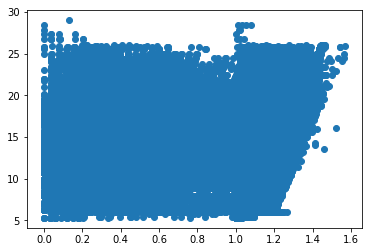

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(feat_inform.balance1,feat_inform.int_rate)
plt.show()

This scatterplot neatly shows the right edge created by loans paid in full and on schedule, increasing with loan rate. Interestingly, there appear to be no loans with rates much above 25% that are paid in full and on time.

In [34]:
feat_raw.query('int_rate> 28')

,id,loan_amnt,term,int_rate,installment,emp_title,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,collections_12_mths_ex_med,mths_since_last_major_derog,issue_d,num_pymnts,pymnts_left,current,balance1,balance2
359139,66431050,10500.0,36,28.49,437.11,Asst. manager,6.0,RENT,40000.0,Current,other,AL,17.59,0.0,2012-08-01,1.0,NaN,NaN,10.0,0.0,4325.0,81.6,11.0,420.49,187.82,232.67,0.00,0.0,0.0,2016-01-01,437.11,Feb-2016,0.0,NaN,2015-12-01,1.0,35.0,True,1.441680,0.040047
361037,66330814,3250.0,36,28.99,136.18,Admin,0.5,RENT,30000.0,Current,debt_consolidation,CA,16.24,0.0,2012-07-01,1.0,NaN,NaN,9.0,0.0,500.0,33.3,9.0,125.71,57.67,68.04,0.00,0.0,0.0,2016-01-01,136.18,Feb-2016,0.0,NaN,2015-12-01,1.0,35.0,True,1.392480,0.038680
361979,66320245,9500.0,36,28.49,395.48,Van Driver,10.0,RENT,29743.0,In Grace Period,medical,CA,24.46,0.0,1995-12-01,1.0,NaN,NaN,8.0,0.0,6909.0,33.9,10.0,0.00,0.00,0.00,0.00,0.0,0.0,NaT,0.00,Feb-2016,0.0,NaN,2015-12-01,NaN,0.0,False,0.000000,0.000000
367999,65696500,12600.0,36,28.49,524.53,Engineer I,0.5,RENT,42000.0,Current,debt_consolidation,TX,22.63,0.0,2010-09-01,0.0,NaN,NaN,20.0,0.0,6648.0,84.2,21.0,594.33,225.38,368.95,0.00,0.0,0.0,2016-01-01,614.27,Feb-2016,0.0,NaN,2015-12-01,1.0,35.0,True,1.698086,0.047169
372255,65723467,3250.0,36,28.49,135.30,None,0.0,OWN,27000.0,Current,debt_consolidation,FL,34.31,0.0,1978-06-01,2.0,NaN,NaN,9.0,0.0,18862.0,72.8,14.0,127.58,58.14,69.44,0.00,0.0,0.0,2015-12-01,135.30,Jan-2016,0.0,NaN,2015-11-01,1.0,35.0,True,1.413194,0.039255
380750,64109518,26875.0,36,28.49,1118.78,Branch Manager,10.0,MORTGAGE,90980.0,Current,debt_consolidation,NC,28.98,1.0,1998-12-01,0.0,20.0,NaN,16.0,0.0,17390.0,85.2,37.0,2152.49,972.86,1179.63,0.00,0.0,0.0,2016-01-01,1118.78,Feb-2016,0.0,NaN,2015-11-01,2.0,34.0,True,1.441668,0.080093
416559,61540951,4550.0,36,28.49,189.42,production,9.0,MORTGAGE,30000.0,Current,credit_card,UT,23.84,2.0,1996-05-01,1.0,7.0,NaN,20.0,0.0,3710.0,28.8,42.0,422.05,164.72,257.33,0.00,0.0,0.0,2016-01-01,189.42,Feb-2016,0.0,53.0,2015-10-01,3.0,33.0,True,1.113099,0.092758
444739,58902366,9100.0,36,28.49,378.83,Housekeeper Manager,5.0,RENT,35000.0,Current,credit_card,VT,16.81,0.0,2009-11-01,0.0,NaN,NaN,3.0,0.0,3942.0,73.0,5.0,1500.92,674.68,826.24,0.00,0.0,0.0,2015-12-01,378.83,Feb-2016,0.0,NaN,2015-08-01,4.0,32.0,True,1.484426,0.164936
447942,58563231,11975.0,36,28.99,501.76,credit and collection specialist,8.0,MORTGAGE,60000.0,Late (31-120 days),house,NJ,24.43,2.0,1994-02-01,4.0,15.0,NaN,21.0,0.0,4037.0,33.1,60.0,1553.49,652.91,900.58,0.00,0.0,0.0,2015-12-01,501.76,Feb-2016,0.0,18.0,2015-08-01,4.0,32.0,False,0.129728,0.129728
449746,58331174,4250.0,36,28.49,176.93,Leasing Agent,3.0,RENT,31000.0,Current,debt_consolidation,SC,33.60,1.0,2007-09-01,0.0,15.0,NaN,17.0,0.0,1518.0,63.2,37.0,700.99,315.11,385.88,0.00,0.0,0.0,2015-12-01,176.93,Feb-2016,0.0,35.0,2015-08-01,4.0,32.0,True,1.484449,0.164939


A lot of these loans are current, and all were issued in 2015. Potentially LC did not have loans with this high of a interest rate before 2015, so they are a bit of a wild card. They are mostly filtered out by the payment number filter above, which I think it fair.

## Setting up the features
Worth noting, a lot of the features in the dataset related to payments are clearly not available at the beginning of the loan, and therefore are not predictive when choosing new loans to fund. The metric also is highly correlated to the given rating and interest rate set by LC. Additionally, a lot of the other data is highly correlated.

In [35]:
feat_inform.columns.values

array(['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status',
       'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'issue_d', 'num_pymnts',
       'pymnts_left', 'current', 'balance1', 'balance2', 'excess_pymnt'], dtype=object)

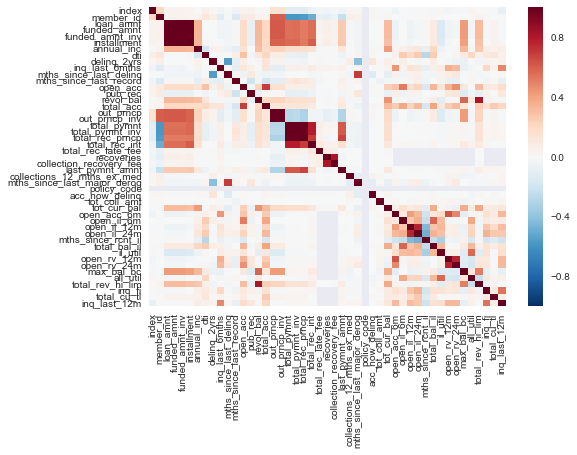

In [36]:
import seaborn as sns
corr=data.corr()
sns.heatmap(corr)
#g=sns.pairplot(data)

Looking at the raw data, some of the correlations are obvious: loan amount, funding amount, and installment are closely tied (or identical). the payment information is highly correlated with itself as well as the funding amounts. delinquencies and records are correlated, balance amounts are correlated. 

Looking at the feature data, there are still correlations - mostly due to payment info, and info that will not be attached to new loans. I will create my final feature set below based on the corr map and data dictionary.

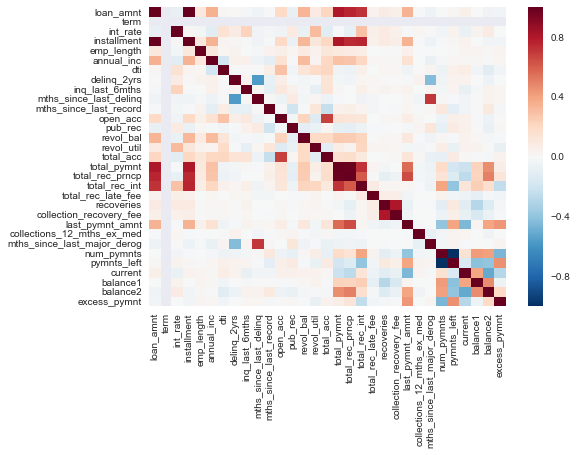

In [37]:
corr=feat_inform.corr()
sns.heatmap(corr)

Interestingly you can get an idea of what numeric (I find them to be continuous as well) values are correlated with the given interest rate: mainly inquiries, delinquincies, dti, and public records; as well as annual income and total accounts with a negative corr. What is tricky are the 'months since last ____' features, as they include a bunch of NaNs, indicating no issues. NaNs can be tricky with ML algos, and beyond setting NaNs to a large number (like 1200 months, or 100 years), it would be hard to work around them. To be safe and simple, I will exclude them from my final features, but if I am unsatisfied I may find a way to include them.

In [38]:
keepfeat=['emp_title', 'emp_length', 'home_ownership',
       'annual_inc','purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths','open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc','collections_12_mths_ex_med']
features=feat_inform[keepfeat]

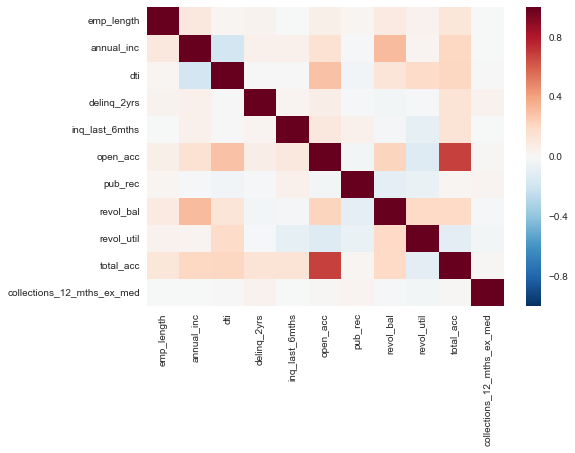

In [39]:
corr=features.corr()
g=sns.heatmap(corr)

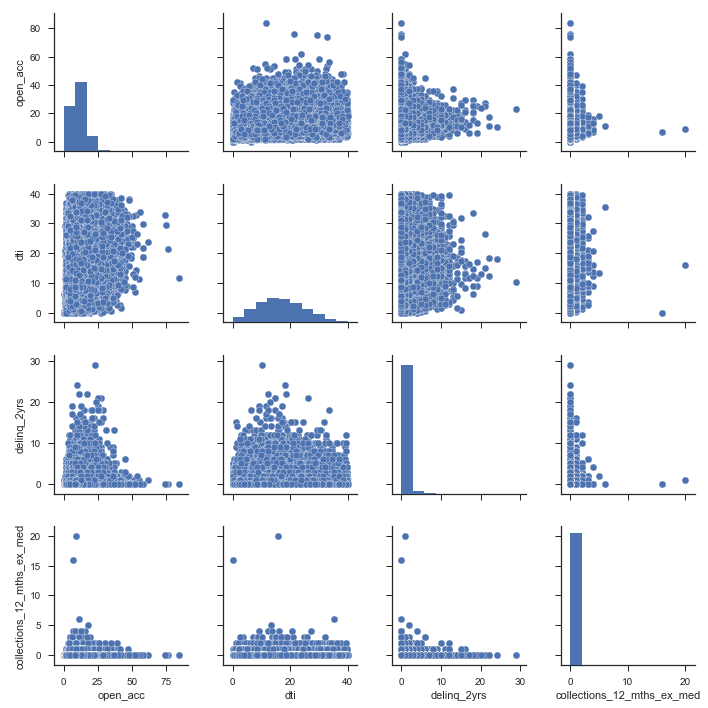

In [40]:
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(features,vars=['open_acc', 'dti','delinq_2yrs','collections_12_mths_ex_med'])

In [41]:
features.isnull().sum()

emp_title                     24581
emp_length                        0
home_ownership                    0
annual_inc                        0
purpose                           0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
collections_12_mths_ex_med        0
dtype: int64

One last thing, check those nulls in emp title, they should be "None". This is fine, as it can be its own category when they are one hot encoded!

In [42]:
features.query('emp_title!=emp_title')

,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med
0,None,10.0,RENT,24000.0,credit_card,AZ,27.65,0.0,1985-01-01,1.0,3.0,0.0,13648.0,83.7,9.0,0.0
1,None,10.0,RENT,12252.0,small_business,IL,8.72,0.0,2001-11-01,2.0,2.0,0.0,2956.0,98.5,10.0,0.0
22,None,7.0,MORTGAGE,17108.0,debt_consolidation,NY,20.34,0.0,1987-12-01,0.0,6.0,0.0,11210.0,86.9,12.0,0.0
32,None,9.0,MORTGAGE,65000.0,other,PA,17.39,0.0,1998-09-01,0.0,8.0,0.0,43936.0,98.1,22.0,0.0
79,None,8.0,MORTGAGE,110000.0,small_business,CT,9.69,0.0,1994-08-01,0.0,7.0,0.0,14136.0,21.9,26.0,0.0
125,None,0.0,OWN,12000.0,debt_consolidation,CA,16.30,0.0,1994-08-01,2.0,13.0,0.0,4853.0,42.2,20.0,0.0
140,None,9.0,MORTGAGE,74000.0,credit_card,SD,8.89,0.0,1998-09-01,0.0,7.0,0.0,7388.0,71.7,10.0,0.0
150,None,6.0,RENT,75000.0,debt_consolidation,CA,22.38,0.0,1998-11-01,1.0,7.0,0.0,19548.0,90.8,17.0,0.0
185,None,5.0,MORTGAGE,50000.0,debt_consolidation,NM,15.58,0.0,2003-05-01,1.0,8.0,0.0,7361.0,83.6,14.0,0.0
205,None,2.0,RENT,75000.0,debt_consolidation,CA,15.57,0.0,2001-01-01,0.0,7.0,0.0,22196.0,94.1,17.0,0.0


### Keep the label as well!

In [43]:
labels=pd.DataFrame
labels=feat_inform['balance1']

In [44]:
labels

0         1.172214
1         1.251522
2         1.222630
3         1.126276
4         1.312715
5         1.161923
6         0.252300
7         1.159661
8         0.747199
9         1.270171
10        1.251926
11        1.051394
12        1.194083
13        1.028257
14        0.667876
15        1.190256
16        1.153631
17        0.341690
18        1.054899
19        0.000000
20        1.121198
21        1.190848
22        1.119667
23        1.096185
24        1.142918
25        1.264134
26        1.172376
27        1.125667
28        1.110840
29        1.187547
30        1.119767
31        1.126365
32        1.305009
33        1.278839
34        1.010977
35        1.159994
36        1.004274
37        1.172457
38        1.028267
39        1.105216
            ...   
619975    1.242781
619976    1.242788
619977    1.219914
619978    1.268904
619979    1.208479
619980    1.128570
619981    1.198310
619982    1.208490
619983    0.244289
619984    1.268902
619985    1.078031
619986    1.

## Export the data

In [45]:
import joblib
joblib.dump(features,'clean_LCfeatures.p')
joblib.dump(labels,'clean_LClabels.p')

['clean_LClabels.p']